In [14]:
import pandas as pd
import matplotlib as plt
# from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set_style()

%matplotlib inline

In [8]:
ferroviaria_dataset = './trem.csv'

In [10]:
df_trem = pd.read_csv(ferroviaria_dataset)
df_trem.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


Converter a coluna Datetime para o tipo de dado datetime

In [11]:
df_trem.Datetime = pd.to_datetime(df_trem.Datetime, format="%d-%m-%Y %H:%M")

Plotando o gráfico

<AxesSubplot:xlabel='Datetime'>

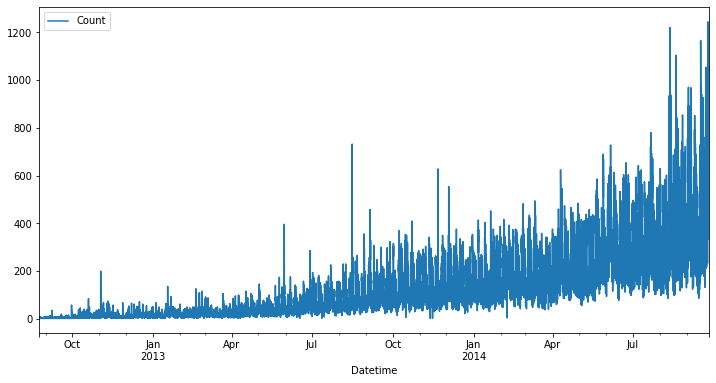

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
df_trem.plot(x='Datetime',y='Count', ax=ax)

## Gerando Features para cada período

In [25]:
df_trem['year'] = df_trem.Datetime.dt.year
df_trem['month'] = df_trem.Datetime.dt.month
df_trem['day'] = df_trem.Datetime.dt.day
df_trem['hour'] = df_trem.Datetime.dt.hour
df_trem['day_of_week'] = df_trem.Datetime.dt.dayofweek

In [28]:
df_trem.tail()

,ID,Datetime,Count,year,month,day,hour,dayofweek,weekend,day_of_week
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3,0,3
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0,3
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0,3
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3,0,3
18287,18287,2014-09-25 23:00:00,534,2014,9,25,23,3,0,3


## Gerando Hipóteses:

### 1. Pessoas viajam mais durante a semana:

Gerando um campo que contenha o final de semana

In [29]:
df_trem['weekend'] = 0
df_trem.loc[(df_trem.day_of_week == 5) | (df_trem.day_of_week == 6), 'weekend'] = 1

Verificar os valores do final de semana X semana

In [30]:
df_trem.weekend.value_counts()

0    13056
1     5232
Name: weekend, dtype: int64

Exibindo valores do final de semana X semana

<AxesSubplot:xlabel='weekend'>

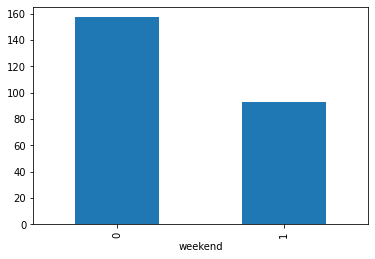

In [32]:
df_trem.groupby('weekend').Count.mean().plot.bar()

A demanda por transporte é muito maior ao londo da semana do que aos finais de semana!

### 2. Há horários de pico por causa das idas e vindas do trabalho

<AxesSubplot:xlabel='hour'>

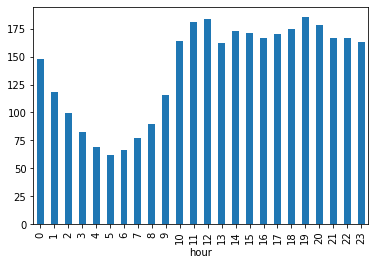

In [34]:
df_trem.groupby('hour').Count.mean().plot.bar()

Podemos ver que temos um horário de pico maior entre 11h AM e 19h PM.

### 3. Tem períodos no ano em que a demanda por transporte é maior:

<AxesSubplot:xlabel='month'>

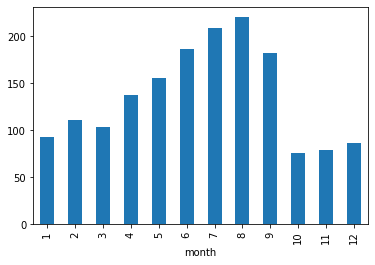

In [35]:
df_trem.groupby('month').Count.mean().plot.bar()

Como podemos ver acima a demana por transporte é maior nos mêses do meio do ano, tendo seu pico máximo no mês de Agosto.